# Projeto final de Disciplia
### Dísciplina: Álgebra Linear Computacional
### Orientador: Prof. Miguel Aroztegui
### Autores: Guilherme Iram, Guilherme Pujoni

## 1 - Introdução

O objetivo desse trabalho é resolver problemas de regressão utilizando mínimos quadrados. Nesta primeira abordagem, iremos utilizar uma aproximação por polinômios. E à vista disso, criaremos uma função preditora e a avaliaremos a sua qualidade por meio de uma medida de desempenho.

## 2 - Métodos

### Regressão pilinomial

Como já descrito na introdução, utilizaremos técnicas de regressão para concluir nosso objetivo. A fórmula de uma função de regressão pode ser vista abaixo:

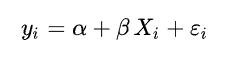

onde:

${\displaystyle y_{i}}$ : Variável explicada (dependente); representa o que o modelo tentará prever

${\displaystyle \alpha }$ : É uma constante, que representa a interceptação da reta com o eixo vertical;

${\displaystyle \beta }$ : Representa a inclinação (coeficiente angular) em relação à variável explicativa;

${\displaystyle X_{i}}$ : Variável explicativa (independente);

- No nosso caso, como estamos tratando de uma regressão polinomial, teremos mais de 1 coeficiente e variável explicativa como insumo para nossa função preditora.

### Minimos quadrados e R²

O alvo da nossa análise sempre será minimizar a norma (distancia) entre o valor da função preditora ("y chapeu") e o y original utilizado para calcular os coeficientes tetas (ou betas, símbolos diferentes para o mesmo elemento). Em virtude disso, o método que adotamos como medida de ajuste do nosso modelo são os mínimos quadrados, cuja fórmula está descrita abaixo: 

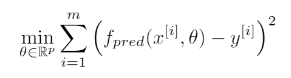

E como medida de desempenho cabal para avaliar a qualidade do modelo iremos utilizar o coeficiente de determinação (R²), que é um número entre 0 e 1 que mede quão bem um modelo estatístico prevê um resultado.

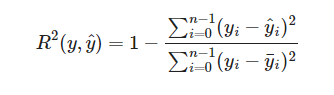

## 3 - Código

## 3.1 - Carregando as bibliotecas e o dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv("./dados/dataset01.txt",sep=' ')

In [3]:
dados.head()

,x,y
0,-10.00,-0.15
1,-9.59,0.56
2,-9.18,-0.33
3,-8.78,0.26
4,-8.37,-0.26


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   y       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [5]:
dados.describe()

,x,y
count,5.000000e+01,50.000000
mean,7.105427e-17,0.955000
std,5.949756e+00,1.155661
min,-1.000000e+01,-1.320000
25%,-4.997500e+00,0.095000
50%,0.000000e+00,0.685000
75%,4.997500e+00,1.840000
max,1.000000e+01,4.090000


## 3.2 - Análise exploratória e vizualização dos dados

In [6]:
X, y = np.array(dados['x']), np.array(dados['y'])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

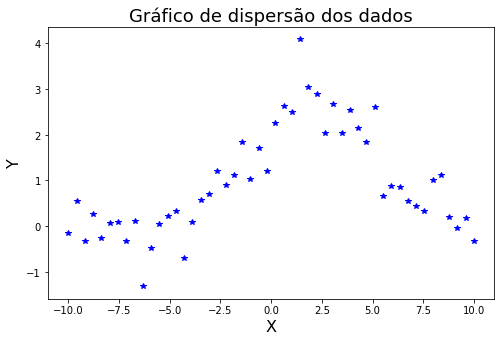

In [7]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão dos dados", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, y, '*b')
plt.show()

## 3.3 - Aplicando Regressão Polinomial

In [8]:
def fpred(x, teta, u):
    l = []
    for i in x:
        l.append(sum(i * teta))
    return np.array([sum(y) + u for y in l])

In [9]:
def R(y, ypred):
    return (1 - ( sum((y - ypred) ** 2) / sum((y - y.mean()) ** 2)) )

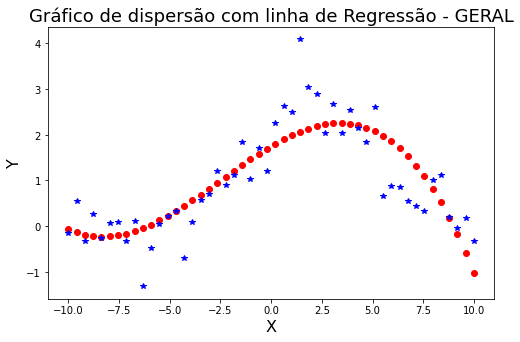

Coeficientes e medida de desemprenho (R2)
a = [-0.00311704]
b = [-0.02290078]
c = [0.26312635]
d = [1.74946465]
R²= [0.70041989]


In [40]:
m = X.shape
a1 = np.ones(m)
a2 = X
a3 = X**2
a4 = X**3

A = np.column_stack((a1,a2,a3,a4))
b = y
coef = np.linalg.solve(A.T@A, A.T@b)
poli = lambda t: coef[0]+coef[1]*t+coef[2]*t**2+coef[3]*t**3
ypred = poli(X)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - GERAL", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X, ypred,'or', X, y, '*b')
plt.show()

print("Coeficientes e medida de desemprenho (R2)")
print('a =',coef[3])
print('b =',coef[2])
print('c =',coef[1])
print('d =',coef[0])
print('R²=', R(y, ypred))

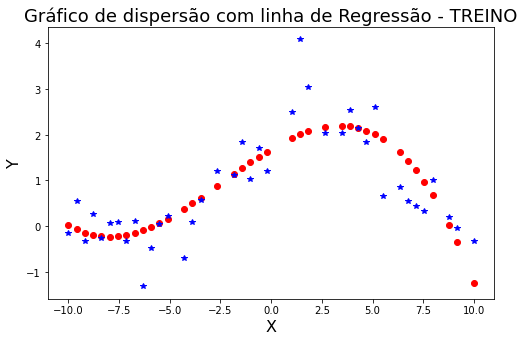

Coeficientes e medida de desemprenho (R2)
a = [-0.00330749]
b = [-0.02297773]
c = [0.26710152]
d = [1.68705896]
R²= [0.69568171]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

m = X_train.shape
a1 = np.ones(m)
a2 = X_train
a3 = X_train**2
a4 = X_train**3

A = np.column_stack((a1,a2,a3,a4))
b = y_train

coef = np.linalg.solve(A.T@A, A.T@b)

poli = lambda t: coef[0]+coef[1]*t+coef[2]*t**2+coef[3]*t**3

ypred = poli(X_train)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TREINO", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)

plt.plot(X_train, ypred,'or', X_train, y_train, '*b')
plt.show()

print("Coeficientes e medida de desemprenho (R2)")
print('a =',coef[3])
print('b =',coef[2])
print('c =',coef[1])
print('d =',coef[0])
print('R²=', R(y_train, ypred))

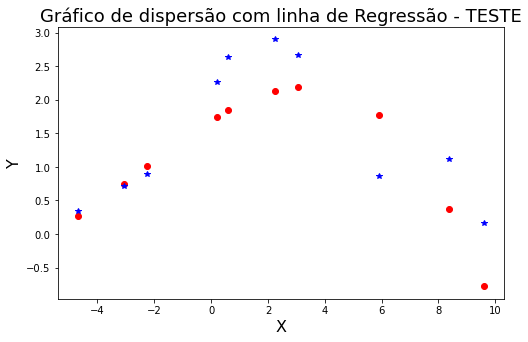

Medida de desemprenho (R2)
R²= [0.59255494]


In [42]:
ypred = poli(X_test)

plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TESTE", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)

plt.plot(X_test, ypred,'or', X_test, y_test, '*b')
plt.show()

print("Medida de desemprenho (R2)")

print('R²=', R(y_test, ypred))


## 3.4 - Comparando Regressões Polinomiais

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)

In [29]:
X_poly = poly_features.fit_transform(X_train)

In [30]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_poly, y_train)

LinearRegression()

In [31]:
teta = modelo.coef_
u = modelo.intercept_

In [32]:
ypred = fpred(X_poly, teta, u)

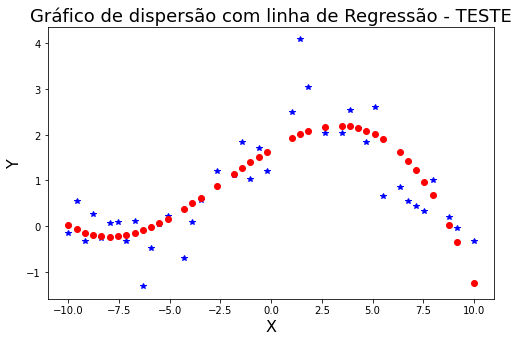

In [33]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TESTE", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X_train, y_train,'*b', X_train, ypred, "or")
plt.show()

In [34]:
R(y_train, ypred)

array([0.69568171])

In [35]:
X_poly = poly_features.fit_transform(X_test)
ypred = fpred(X_poly, teta, u)

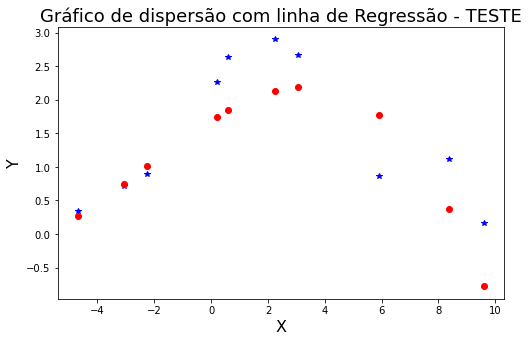

In [36]:
plt.figure(figsize=(8, 5))
plt.title("Gráfico de dispersão com linha de Regressão - TESTE", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.plot(X_test, y_test,'*b', X_test, ypred, "or")
plt.show()

In [37]:
R(y_test, ypred)

array([0.59255494])

## 4 - Análise dos resultados